# Imports

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split #Used to split data set into training and testing
import csv
from sklearn.tree import DecisionTreeRegressor

# Importing and Splitting data

In [9]:
file = open("audi.csv")
tester = csv.reader(file)

rows = []
for row in tester:
        rows.append(row)
rows.pop(0)

test = pd.read_csv("audi.csv", quotechar='"', skipinitialspace=True)


Y = test.price
X = test.drop(['price', 'model', 'transmission', 'fuelType'], axis = 1) 
X = X.head(200)
Y = Y.head(200)
print(test)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 601)

      model  year  price transmission  mileage fuelType  tax   mpg  engineSize
0        A1  2017  12500       Manual    15735   Petrol  150  55.4         1.4
1        A6  2016  16500    Automatic    36203   Diesel   20  64.2         2.0
2        A1  2016  11000       Manual    29946   Petrol   30  55.4         1.4
3        A4  2017  16800    Automatic    25952   Diesel  145  67.3         2.0
4        A3  2019  17300       Manual     1998   Petrol  145  49.6         1.0
...     ...   ...    ...          ...      ...      ...  ...   ...         ...
10663    A3  2020  16999       Manual     4018   Petrol  145  49.6         1.0
10664    A3  2020  16999       Manual     1978   Petrol  150  49.6         1.0
10665    A3  2020  17199       Manual      609   Petrol  150  49.6         1.0
10666    Q3  2017  19499    Automatic     8646   Petrol  150  47.9         1.4
10667    Q3  2016  15999       Manual    11855   Petrol  150  47.9         1.4

[10668 rows x 9 columns]


# Using Scikit-Learn

In [158]:
myTree = DecisionTreeRegressor(random_state = 601)
myTree.fit(X_train,Y_train)
# tree.predict(X_test)
s = myTree.score(X_test, Y_test)
print("Error rate: ", 1 - s)

Error rate:  0.5615672543728103


In [153]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

reg = RandomForestRegressor(
  n_estimators=1, 
  max_depth=200000, 
  bootstrap=False, 
  random_state = 601
)
reg.fit(X, Y)

RandomForestRegressor(bootstrap=False, max_depth=200000, n_estimators=1,
                      random_state=601)

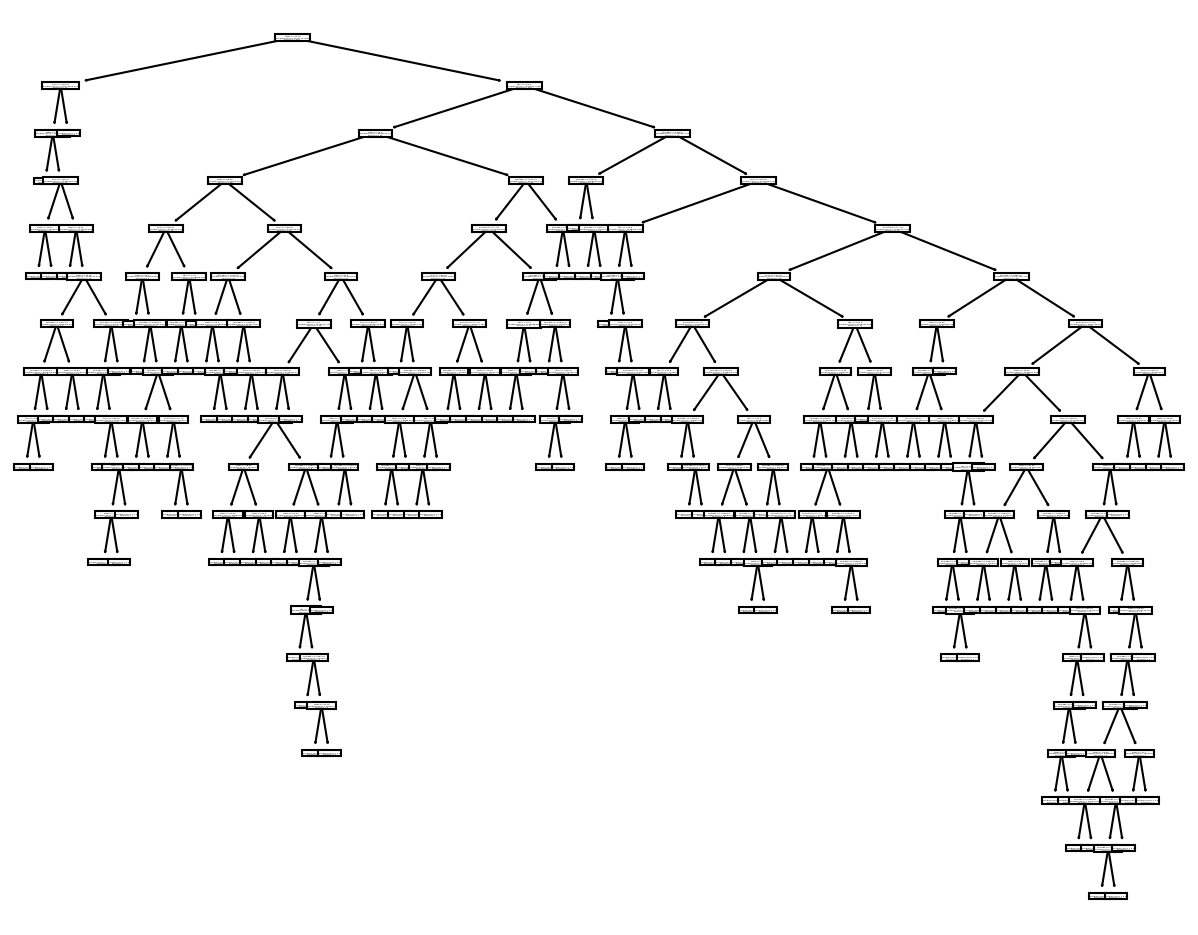

In [161]:
# from sklearn import tree
# fig = plt.figure(figsize=(25,20))
# test = tree.plot_tree(reg, feature_names=X.columns, filled=True)

from sklearn.tree import plot_tree
plt.figure(figsize=(10,8), dpi=150)
plot_tree(myTree, feature_names=X.columns);

# Entropy

In [163]:
def calc_total_entropy(train_data, label, class_list):
    total_row = train_data.shape[0]
    total_entr = 0
    
    for c in class_list: 
        total_class_count = train_data[train_data[label] == c].shape[0] 
        total_class_entr = - (total_class_count/total_row)*np.log2(total_class_count/total_row) 
        total_entr += total_class_entr 
    
    return total_entr

# RMSE

In [125]:
def rmse(h, y):
  return sqrt(mean_squared_error(h, y))